In [1]:
import numpy as np
import pylab
import math
import matplotlib.pyplot as plt
import scipy.stats as sps
%matplotlib inline
# Поддержка русскоязычных надписей.
pylab.rc('font',**{'family':'verdana'})

In [2]:
# Чтение выборки из файла.
f = open('weibull.txt', 'r')
sample = []
for x in f:
    sample.append(float(x))
f.close()

In [8]:
# Плотность распределения Вейбула с параметром формы g.
def p(g, x):
    if (x >= 0):
        return g * (x**(g - 1)) * (math.exp(-(x ** g)))
    else:
        return 0

In [4]:
# Логарифмическая функция правдоподобия.
def log_fn(g, n):
    Sum = float(n) * math.log(g)
    for x in sample[:n]:
        Sum += (g - 1) * math.log(x) - x ** g
    return Sum

In [5]:
# Считает оценку максимального правдоподобия.
def max_arg(n):
    # Переберем log10(y) в [-2; 0.7] т.к. при бОльший значениях функция 
    # принимает значиельно большие по модулю отрицательные значения.
    x = np.linspace(-2, .7, 1000)
    y = [log_fn(10**t, n) for t in x]

    gg = [10**t for t in x]
    plt.plot(gg,y)

    # Находим maxarg.
    max_index = 0
    max_fn = y[0]

    for i in range(1, x.size):
        if (y[i] > max_fn):
            max_fn = y[i]
            max_index = i

    max_arg = 10 ** x[max_index]
    plt.scatter(max_arg, max_fn)
    plt.title(u"Логарифмическая функция правдоподобия и максимальное значение")
    plt.show()
    return max_arg

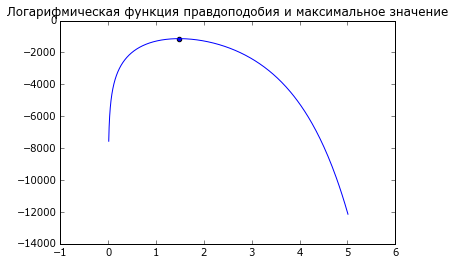

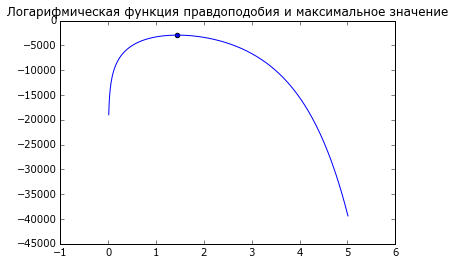

In [6]:
# Оценка за первые 4 года.
four_years = max_arg(4*365)
# Оценка по всей выборке.
all_years = max_arg(len(sample))

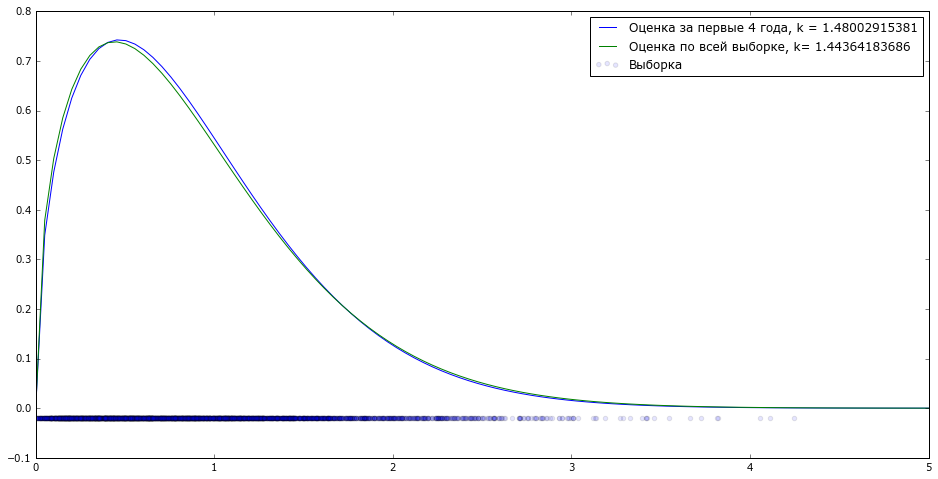

In [14]:
# График плотности искомого распределения.
x = np.linspace(0, 5, 100)
y = [p(four_years, t) for t in x]
z = [p(all_years, t) for t in x]
plt.figure(figsize=(16, 8))
plt.plot(x, y, label=u"Оценка за первые 4 года, k = " + str(four_years))
plt.plot(x, z, label=u"Оценка по всей выборке, k= " + str(all_years))
plt.scatter(sample, np.zeros(len(sample)) - 0.02, alpha=0.1, label=u"Выборка")
plt.xlim(0, 5)
plt.legend()
plt.show()